In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout
import tensorflow.compat.v1 as tf
import scipy.misc
import os
from imutils import paths

INIT_LR = 1e-4
input_shape = (66, 200, 3)
from tensorflow.compat.v1 import Session,ConfigProto
from tensorflow.compat.v1.keras.backend import set_session
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(Session(config=config))

In [ ]:
def defineModel():
    model = Sequential()

    #5x5 Convlolutional layer with stride of 2x2
    model.add(Conv2D(24, (5,5), strides = (2,2), activation = 'elu', input_shape = input_shape))
    model.add(Conv2D(36, (5,5), strides = (2,2), activation = 'elu'))
    model.add(Conv2D(48, (5,5), strides = (2,2), activation = 'elu'))

    #3x3 Convolutional layers with stride of 1x1
    model.add(Conv2D(64, (3,3), activation = 'elu'))
    model.add(Conv2D(64, (3,3), activation = 'elu'))

    # Flatten before passing to the fully connected layers
    model.add(Flatten())
    #There fully connected layers
    model.add(Dense(100,activation = 'elu'))
    model.add(Dropout(.25))
    model.add(Dense(50, activation = 'elu'))
    model.add(Dropout(.25))
    model.add(Dense(10, activation ='elu'))
    model.add(Dropout(.25))

    #Output layer with linear activation
    model.add(Dense(1, activation = 'linear'))

    return model

In [ ]:
import scipy.misc
import random
import imageio
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tqdm import tqdm

size = (200,66)
xs=[]
ys=[]
xs2 = []
ys2 = []
i=0

tk = 0
with open("/content/drive/MyDrive/Case-2: Self Driving Car/driving_dataset/data.txt") as f:
    for line in f:
        xs2.append("/content/drive/MyDrive/Case-2: Self Driving Car/driving_dataset/" + line.split()[0])
        i= i+1
        #print(i)
        imgdir = ("/content/drive/MyDrive/Case-2: Self Driving Car/driving_dataset/" + line.split()[0])
        img = cv2.imread (imgdir)[-150:]
        #cv2_imshow(img)
        img = cv2.resize(img,size)/255
        #print(img.shape)
        xs.append (img)
        ys.append(float(line.split()[1]) * scipy.pi / 180)
        ys2.append(float(line.split()[1]) * scipy.pi / 180)
        tk = tk+1
        if tk==5000:
            break




In [ ]:
xs = np.array(xs,dtype='float32')
ys = np.array(ys,dtype='float32')
print(len(xs))
print(len(ys))

5000
5000


In [ ]:
np.save('/content/drive/MyDrive/Case-2: Self Driving Car/Keras/train',xs)
np.save('/content/drive/MyDrive/Case-2: Self Driving Car/Keras/train_labels',ys)

In [ ]:
import numpy as np
xs=np.load('/content/drive/MyDrive/Case-2: Self Driving Car/Keras/train.npy')
ys=np.load('/content/drive/MyDrive/Case-2: Self Driving Car/Keras/train_labels.npy')
print(xs.shape)
print(ys.shape)

(5000, 66, 200, 3)
(5000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(xs,ys,test_size = 0.3)

In [ ]:
model = defineModel()
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True)

datagen.fit(x_train)

In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size = 100),
          steps_per_epoch = len(x_train) / 100, epochs = 10)

Epoch 1/10
35/35 [==============================] - 31s 865ms/step - loss: 1.2553
Epoch 2/10
35/35 [==============================] - 31s 865ms/step - loss: 1.1693
Epoch 3/10
35/35 [==============================] - 31s 865ms/step - loss: 1.1390
Epoch 4/10
35/35 [==============================] - 31s 864ms/step - loss: 1.1028
Epoch 5/10
35/35 [==============================] - 31s 863ms/step - loss: 1.0597
Epoch 6/10
35/35 [==============================] - 31s 865ms/step - loss: 1.0183
Epoch 7/10
35/35 [==============================] - 31s 865ms/step - loss: 1.0198
Epoch 8/10
35/35 [==============================] - 31s 864ms/step - loss: 1.0037
Epoch 9/10
35/35 [==============================] - 31s 862ms/step - loss: 0.9973
Epoch 10/10
35/35 [==============================] - 30s 862ms/step - loss: 0.9796


In [ ]:
model.save("/content/drive/MyDrive/Case-2: Self Driving Car/Keras/model.h5")

In [ ]:
from keras import models    
model = models.load_model('/content/drive/MyDrive/Case-2: Self Driving Car/Keras/model.h5')

#Prediction with angle

In [ ]:
import tensorflow.compat.v1 as tf

In [ ]:
import cv2
import imutils
from keras.preprocessing import image
wheel = cv2.imread(r"/content/drive/MyDrive/Case-2: Self Driving Car/steering_wheel_image.jpg")
for i in range(x_val.shape[0]):
    img = cv2.imread(xs2[i])
    cv2_imshow(img)
    #rows,cols = img.shape
    image=cv2.resize(img[-150:], (200,66))                
    image = tf.keras.preprocessing.image.img_to_array(image)/255
    k = image.shape
    image = image.reshape(1,k[0],k[1],k[2])
    alamin = model.predict(image)
    alamin = alamin[0][0]
    print(alamin)
    rot = imutils.rotate(wheel, angle=alamin)
    cv2_imshow(rot)
    cv2.waitKey(0)

In [ ]:
alamin = model.predict(image)

In [ ]:
alamin[0][0]

0.33949146

#Angle

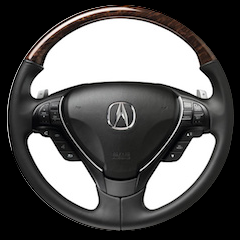

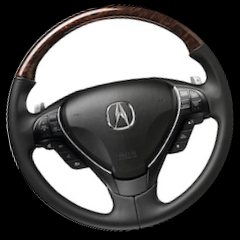

-1

In [ ]:
import cv2
import imutils
image =  cv2.imread(r"/content/drive/MyDrive/Case-2: Self Driving Car/steering_wheel_image.jpg")
cv2_imshow(image)
rot = imutils.rotate(image, angle=10)
cv2_imshow(rot)
cv2.waitKey(0)